/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  from ipykernel import kernelapp as app


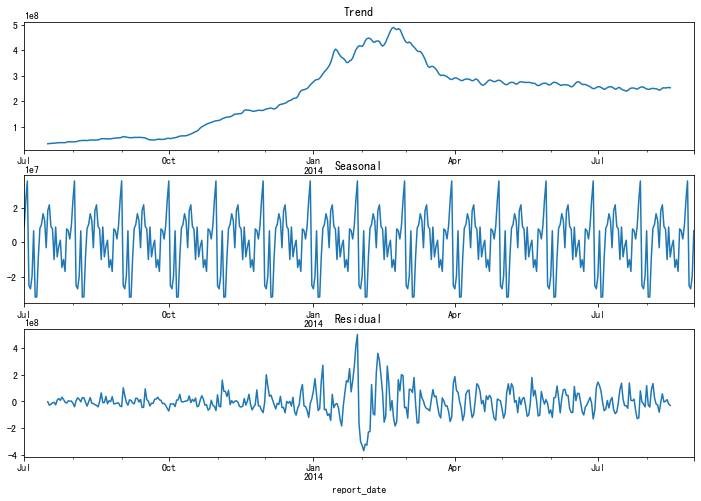

In [10]:
import pandas as pd
#读文件
data = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'])
data

#买卖
total_balance = data.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance

purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
import matplotlib.pyplot as plt

import statsmodels.api as sm

#绘制图形
def plot_stl(data):
	result = sm.tsa.seasonal_decompose(data, freq=30)
	fig = plt.figure(figsize=(12,8))
	ax1 = fig.add_subplot(311)
	ax2 = fig.add_subplot(312)
	ax3 = fig.add_subplot(313)
	result.trend.plot(ax=ax1, title= 'Trend')
	result.seasonal.plot(ax=ax2, title= 'Seasonal')
	result.resid.plot(ax=ax3, title= 'Residual')
plot_stl(purchase['total_purchase_amt'])


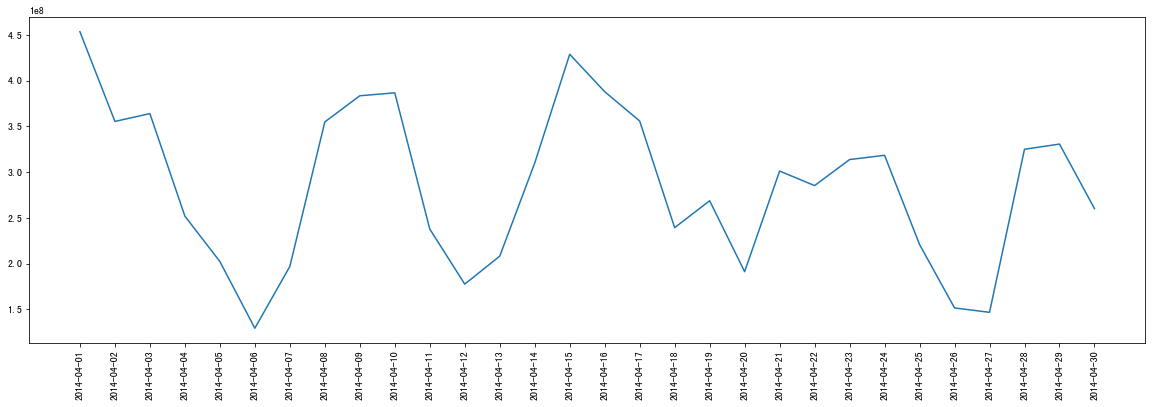

In [13]:
#取4月份的数据
purchase2 = purchase[(purchase.index>='2014-04-01')&(purchase.index<='2014-04-30')]
plt.figure(figsize=(20,6))
plt.plot(purchase2.total_purchase_amt)
date_range = pd.date_range('2014-04-01', '2014-04-30')
plt.xticks(date_range, rotation=90)
plt.show()

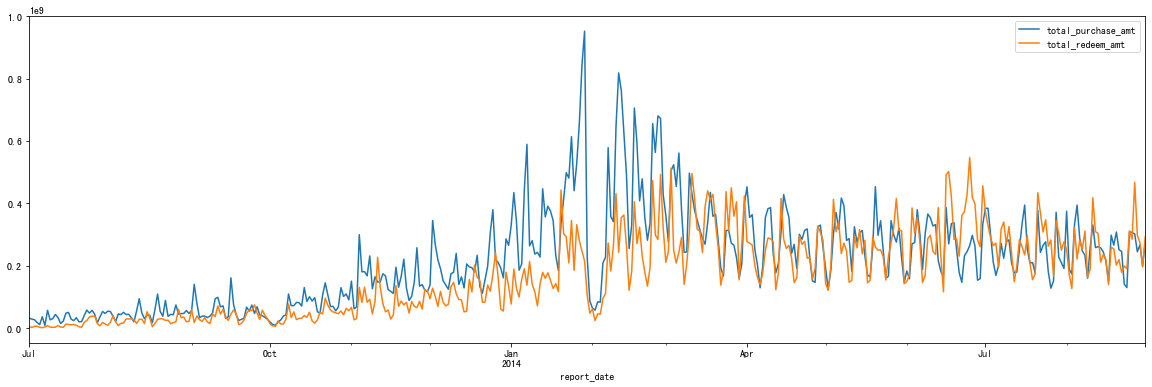

(-7.947102224652343,
 3.198186862488185e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [16]:

total_balance.plot(figsize=(20,6))
plt.show()
#计算adf
from  statsmodels.tsa.stattools import adfuller
t =adfuller(purchase)
#1阶差分
diff1 = purchase.diff(1)
t = adfuller(diff1[1:])
t



In [17]:
#进行差分，看adf
diff1 = redeem.diff(1)
t = adfuller(diff1[1:])
t



(-11.69198690696884,
 1.6443717458497645e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [22]:

#import pmdarima as pm
#pm.arima.ndiffs(purchase, test='adf')
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(purchase, order=(7,1,5)).fit()
#做9月份的预测purchase
purchase_pred = model.predict('2014-09-01', '2014-09-30', typ='levels')
purchase_pred

model.aic

#做9月份的预测redeem
model = ARIMA(redeem, order=(7,1,5)).fit()
redeem_pred = model.predict('2014-09-01', '2014-09-30', typ='levels')
redeem_pred
model.aic



/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packag

In [27]:

#输出结果 
result = pd.DataFrame()
result['report_date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result
result['report_date'] = result['report_date'].apply(lambda x: str(x).replace('-','')[:8])
result
result.to_csv('tsa_base.csv', header=None, index=None)
